In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
# import time


from sklearn.model_selection import GridSearchCV

# ACC = []

In [30]:
import warnings
warnings.filterwarnings('ignore')

# Dataset Prepration
- Load dataset
- Check the keys of the dataset
- Convet data from a Scikit-learn Bunch object to a Pandas DataFrame
- Remove 'id' column
- Substitude Diagnosis (M = malignant, B = benign)) to 1 and 0, respectively.
- Missing values
- Split the DataFrame into X (the data) and y (the labels)
- Check class distribution

In [31]:
initial_data = pd.read_csv('E:/PartB/Behnaz PhD Research/PhD Research/PhD Thesis/Classification/DataSet/Breast-Cancer-Wisconsin-Diagnostic-DataSet-master/data.csv')

In [32]:
initial_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [33]:
df = pd.DataFrame(initial_data, columns=initial_data.columns)
df = df.drop(['id','Unnamed: 32'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [35]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [37]:
# Checking for missing values
for c in X.columns:
    no_missing = df[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    else:
        print(c)
        print("No missing values")
        print(' ')

radius_mean
No missing values
 
texture_mean
No missing values
 
perimeter_mean
No missing values
 
area_mean
No missing values
 
smoothness_mean
No missing values
 
compactness_mean
No missing values
 
concavity_mean
No missing values
 
concave points_mean
No missing values
 
symmetry_mean
No missing values
 
fractal_dimension_mean
No missing values
 
radius_se
No missing values
 
texture_se
No missing values
 
perimeter_se
No missing values
 
area_se
No missing values
 
smoothness_se
No missing values
 
compactness_se
No missing values
 
concavity_se
No missing values
 
concave points_se
No missing values
 
symmetry_se
No missing values
 
fractal_dimension_se
No missing values
 
radius_worst
No missing values
 
texture_worst
No missing values
 
perimeter_worst
No missing values
 
area_worst
No missing values
 
smoothness_worst
No missing values
 
compactness_worst
No missing values
 
concavity_worst
No missing values
 
concave points_worst
No missing values
 
symmetry_worst
No missin

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

df1 = df.drop(['diagnosis'], axis=1)
X = pd.DataFrame(X, columns = [df1.columns])
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


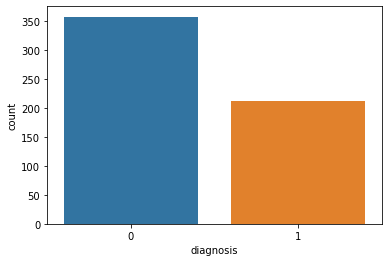

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['diagnosis'],label="Sum")
plt.savefig('E:/PartB/Behnaz PhD Research/PhD Research/PhD Thesis/Classification/Figures/BreastCancerClassDist')
plt.show()

# Handling class imbalanced 

In [40]:
# # Under sampling
# # Class count
# count_class_0, count_class_1 = df.diagnosis.value_counts()

# # Divide by class
# df_class_0 = df[df['diagnosis'] == 0]
# df_class_1 = df[df['diagnosis'] == 1]
# # df_class_0.shape,df_class_1.shape

# ## Undersample 0-class and concat the DataFrames of both class
# df_class_0_under = df_class_0.sample(count_class_1)
# df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
# # print('Random under-sampling:')
# # print(df_test_under.diagnosis.value_counts())

# X = df_test_under.drop(['diagnosis'], axis=1)
# y = df_test_under['diagnosis']
# X

In [41]:
# Over sampling
# Class count
count_class_0, count_class_1 = df.diagnosis.value_counts()

# Divide by class
df_class_0 = df[df['diagnosis'] == 0]
df_class_1 = df[df['diagnosis'] == 1]
# df_class_0.shape,df_class_1.shape

## Undersample 0-class and concat the DataFrames of both class
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over.diagnosis.value_counts())

X = df_test_over.drop(['diagnosis'], axis=1)
y = df_test_over['diagnosis']
# df_test_over

# df1 = X
# df1['diagnosis'] = y
# df1
pd.DataFrame(df_test_over).to_csv("E:/PartB/Behnaz PhD Research/PhD Research/PhD Thesis/Classification/Saved data/BC.csv", header=None, index=None)
   

Random over-sampling:
1    357
0    357
Name: diagnosis, dtype: int64


In [42]:
count_class_0, count_class_1 = df_test_over.diagnosis.value_counts()
count_class_0, count_class_1

(357, 357)

In [43]:
# SMOTE
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority')
# X, y = smote.fit_sample(X, y)

# # y.value_counts()



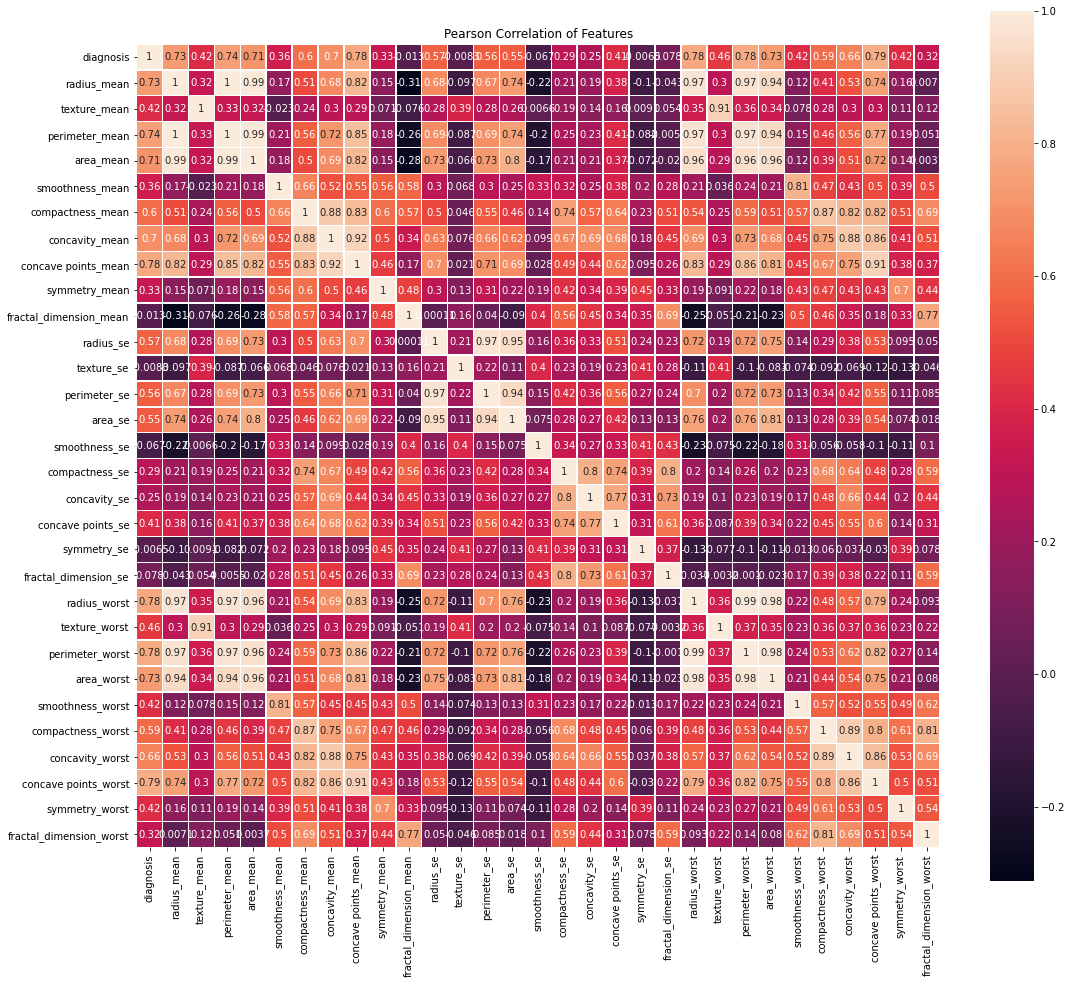

In [44]:
#correlation-matrix
plt.subplots(figsize=(18, 16))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(df.corr(),linewidths=0.5, vmax=1.0, square=True,annot=True)
plt.savefig('E:/PartB/Behnaz PhD Research/PhD Research/PhD Thesis/Classification/Figures/BreastCancerPearsonCorrelation')
plt.show()

- The correlation matrix provids the relationship between each pair of features. 
- The following pairs of features are closely related as indicated by their high correlation coefficients:
 - radius_mean and radius_worst (0.97)
 - radius_mean and perimeter_worst (0.97)
 - radius_mean and area_worst (0.94)
 - ...

# Classification using different algorithms

- Linear Regression (LR)
- Decision Tree
- Support Vector Machine (SVM)
- Linear Discriminant Analysis (LDA) 
- Quadratic Discriminant Analysis (QDA)
- K-Nearest Neighbours (KNN)
- Gaussian Naive Bayes



# Different way of measuring binary classification models

# Simple approach:
- Spliting a given data into training set and testing set
- Defining a classifier
- fitting
- Scoring

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
type(y_train)

LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.9776536312849162

In [46]:
# or the following function can be used to test different methods
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [47]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

0.9776536312849162

# K-Fold Cross Validation

In [48]:
kf =  KFold(n_splits=10, shuffle=True, random_state=0)

# to see the train test split, you can run the following lines
for train_index, test_index in kf.split(X):
    print(train_index, test_index)
    

[  0   2   3   4   5   6   7   9  10  11  12  13  15  16  17  18  19  20
  21  22  23  24  25  26  28  29  30  32  33  34  35  36  37  38  39  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77  78  80
  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 158 159 160 161 162 163 164 165 166 167 168 169 171 172 173 174 176
 177 178 179 180 182 183 184 185 186 187 188 189 190 191 192 194 195 196
 197 198 199 200 201 203 204 205 206 207 208 209 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 232 233 234 235
 237 238 239 241 242 244 245 246 247 248 250 251 253 254 255 256 257 258
 259 260 262 263 264 265 266 268 269 270 271 272 27

# Stratified K-Fold
Instead of K-Fold, StratifiedKFold can be used. (StratifiedKFold divides each classification categories in a uniform way)

In [49]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 10, shuffle=True, random_state=0)

scores_logistic = []
scores_svm = []
scores_rf = []
i = 0
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                       y.iloc[train_index], y.iloc[test_index]
    i = i + 1
    scores_logistic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

    
import statistics
statistics.mean(scores_logistic) 



0.9480829420970266

- The metioned code was for better understanding the process. Sklearn library provides a method called "cross_validate" which can be simply used instead of upper mentioned code.

# cross_validate

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
# df = pd.read_csv('E:/PartB/Behnaz PhD Research/PhD Research/PhD Thesis/Classification/Saved data/BC.csv')
# X = df.drop(['0'], axis=1)
# y = df['0']

# Linear Regression

In [52]:
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LogisticRegression(), X, y, scoring=scoring, cv=10)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

#Or
# start = time.time()
# y_pred = cross_val_predict(LogisticRegression(), X, y, cv=10)
# end = time.time()
# acc = accuracy_score(y, y_pred)
# sc = precision_recall_fscore_support(y, y_pred, average='binary')
# roc_s = roc_auc_score(y, y_pred)


# ACC.append((end - start,acc,sc[0],sc[1],sc[2],roc_s))
# print(end - start,acc,sc,roc_s)


# Decision Tree

In [53]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X, y, scoring=scoring, cv=10)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

# #Or
# start = time.time()
# y_pred = cross_val_predict(decision_tree, X, y, cv=10)
# end = time.time()
# acc = accuracy_score(y, y_pred)
# sc = precision_recall_fscore_support(y, y_pred, average='binary')
# roc_s = roc_auc_score(y, y_pred)

# print(end - start,acc,sc,roc_s)


# SVM

In [55]:
# SVM = SVC(probability = True)
SVM = SVC( C = 47.855859375,kernel='linear')

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X, y, scoring=scoring, cv=10)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

#Or
# start = time.time()
# y_pred = cross_val_predict(SVM, X, y, cv=10)
# end = time.time()
# acc = accuracy_score(y, y_pred)
# sc = precision_recall_fscore_support(y, y_pred, average='binary')
# roc_s = roc_auc_score(y, y_pred)

# ACC.append((end - start,acc,sc[0],sc[1],sc[2],roc_s))

# print(end - start,acc,sc,roc_s)

# Using optunity library for Hyper Parameter Tuning

In [20]:
import optunity
import optunity.metrics

import sklearn.svm
import numpy as np
X1 = np.array(X.reset_index())
y1 = np.array(y.reset_index())[:,1]

cv_decorator = optunity.cross_validated(x=X1, y=y1, num_folds=5)

# space = {'kernel': {'linear': {'C': [0, 2]},
#                     'rbf': {'logGamma': [-5, 0], 'C': [0, 10]},
#                     'poly': {'degree': [2, 5], 'C': [0, 5], 'coef0': [0, 2]}
#                     }
#          }

space = {'kernel': {'linear': {'C': [0.1, 50]},'rbf': {'C': [0.1, 50]},'poly': {'C': [0.1, 50]} } }
def train_model(x_train, y_train, kernel, C, logGamma, degree, coef0):
    """A generic SVM training function, with arguments based on the chosen kernel."""
    if kernel == 'linear':
        model = sklearn.svm.SVC(kernel=kernel, C=C)
    elif kernel == 'poly':
        model = sklearn.svm.SVC(kernel=kernel, C=C, degree=degree, coef0=coef0)
    elif kernel == 'rbf':
        model = sklearn.svm.SVC(kernel=kernel, C=C, gamma=10 ** logGamma)
    else:
        raise ArgumentError("Unknown kernel function: %s" % kernel)
    model.fit(x_train, y_train)
    return model

def svm_tuned_auroc(x_train, y_train, x_test, y_test, kernel='linear', C=0, logGamma=0, degree=0, coef0=0):
    model = train_model(x_train, y_train, kernel, C, logGamma, degree, coef0)
    decision_values = model.decision_function(x_test)
    return optunity.metrics.roc_auc(y_test, decision_values)

svm_tuned_auroc = cv_decorator(svm_tuned_auroc)

start = time.time()
optimal_svm_pars, info, _ = optunity.maximize_structured(svm_tuned_auroc, space, num_evals=150)
end = time.time()
print("Optimal parameters" + str(optimal_svm_pars))
print("AUROC of tuned SVM: %1.3f" % info.optimum)

Optimal parameters{'kernel': 'linear', 'C': 47.855859375}
AUROC of tuned SVM: 1.000


# Using Grid Search to tune SVM

In [ ]:
# GridSearchCV for tuning SVM

# param_grid = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':np.arange(0.1, 30, 0.1).tolist()}

# start = time.time()
# clf = GridSearchCV(SVM,param_grid, cv=10, return_train_score=False)
# clf.fit(X, y)
# end = time.time()

# df = pd.DataFrame(clf.cv_results_)
# df[['param_C','param_kernel','mean_test_score']]
# print(end - start,clf.best_params_)

# LDA

In [56]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X, y, scoring=scoring, cv=10)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

# QDA

In [57]:
QDA = QuadraticDiscriminantAnalysis() 

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X, y, scoring=scoring, cv=10)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

# Random Forest

In [58]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X, y, scoring=scoring, cv=10)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

# KNN

In [59]:
# KNN = KNeighborsClassifier()
KNN = KNeighborsClassifier(n_neighbors=6)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X, y, scoring=scoring, cv=10)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

#Or
# KNN = KNeighborsClassifier(n_neighbors=1)
# acc = accuracy_score(y, y_pred)
# sc = precision_recall_fscore_support(y, y_pred, average='binary')
# roc_s = roc_auc_score(y, y_pred)

# ACC.append((end - start,acc,sc[0],sc[1],sc[2],roc_s))
# print(end - start,acc,sc,roc_s)


# Using hyperband Library for Hyper Parameter Tuning

In [65]:
from hyperband import HyperbandSearchCV
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
rf_params = {'n_neighbors': range(1,20)}
clf = KNeighborsClassifier()
start = time.time()
hyper = HyperbandSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=1,max_iter=20,scoring='accuracy',resource_param='n_neighbors')
start = time.time()
hyper.fit(X, y)
end = time.time()
print(hyper.best_params_)
print("Accuracy:"+ str(hyper.best_score_))

In [ ]:
# k_range = list(range(1,20))
# # weight_options = ["uniform", "distance"]

# param_grid = dict(n_neighbors = k_range)#, weights = weight_options)

# start = time.time()
# grid = GridSearchCV(KNN, param_grid, cv = 10, scoring = 'accuracy')
# grid.fit(X,y)
# end = time.time()


# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)
# print(end - start)

# Naive Bayes

In [60]:
bayes = GaussianNB()
# bayes = GaussianNB(var_smoothing= 0.19840000000000002)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X, y, scoring=scoring, cv=10)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

#Or
# start = time.time()
# y_pred = cross_val_predict(bayes, X, y, cv=10)
# end = time.time()
# acc = accuracy_score(y, y_pred)
# sc = precision_recall_fscore_support(y, y_pred, average='binary')
# roc_s = roc_auc_score(y, y_pred)

# ACC.append((end - start,acc,sc[0],sc[1],sc[2],roc_s))

# print(end - start,acc,sc,roc_s)


In [ ]:
# alpha_range = np.arange(0, 1, 0.0001).tolist()
# param_grid = dict(var_smoothing = alpha_range)


# start = time.time()
# grid= GridSearchCV(bayes, param_grid)
# grid.fit(X,y)
# end = time.time()

# # print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)
# print(end - start)
# # bayes.get_params().keys()

In [62]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)
# models_initial.to_excel("E:/PartB/Behnaz PhD Research/PhD Research/PhD Thesis/Classification/Tables/outputBC.xlsx") 
models_initial

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Logistic Regression,0.047671,0.010394,0.939710,0.942741,0.939444,0.939580,0.988825
1,Decision Tree,0.009994,0.008394,0.964926,0.966066,0.964881,0.964897,0.964881
2,Support Vector Machine,7.129218,0.008795,0.949491,0.951421,0.949325,0.949414,0.989925
3,Linear Discriminant Analysis,0.044451,0.008694,0.956573,0.959387,0.956667,0.956478,0.994495
4,Quadratic Discriminant Analysis,0.004697,0.010094,0.955145,0.956201,0.955119,0.955110,0.992950
5,Random Forest,0.208372,0.027583,0.983196,0.983550,0.983214,0.983192,0.998896
6,K-Nearest Neighbors,0.006095,0.013592,0.942508,0.943517,0.942460,0.942465,0.978762
7,Bayes,0.003498,0.008095,0.924354,0.927314,0.924405,0.924217,0.984429
